In [62]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [63]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [64]:
dd = pd.read_csv("Salary_Data.csv")

In [65]:
dd.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [66]:
dd.shape

(30, 2)

In [67]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [68]:
dd.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [69]:
dd.dtypes

,0
YearsExperience,float64
Salary,int64


In [70]:
dd.isnull().sum()

,0
YearsExperience,0
Salary,0


In [71]:
dd.skew()

,0
YearsExperience,0.37956
Salary,0.35412


In [72]:
dd.kurtosis()

,0
YearsExperience,-1.012212
Salary,-1.295421


In [73]:
dd.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [74]:
dd.cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


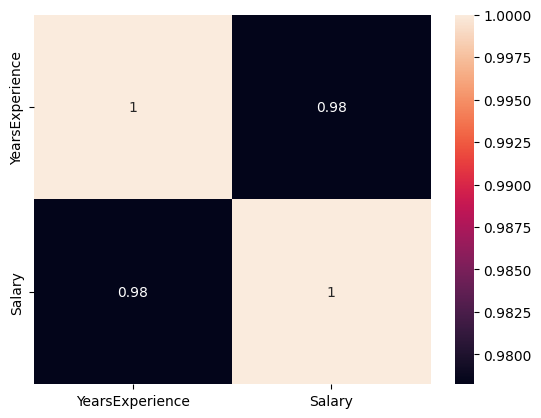

In [75]:
sns.heatmap(dd.corr(),annot= True)
plt.show()

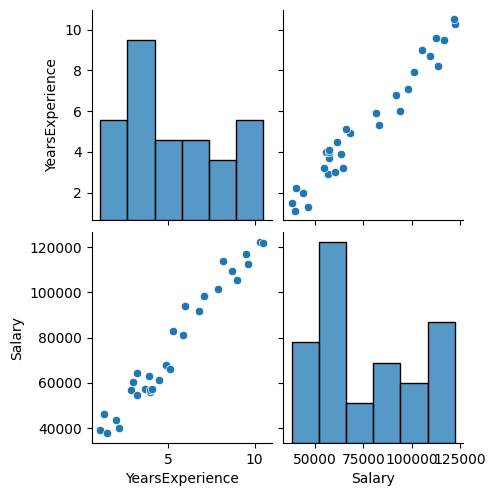

In [76]:
sns.pairplot(data=dd)

In [77]:
X = dd.drop("Salary", axis=1)
y = dd.Salary

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=40)

In [79]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [80]:
lr.intercept_

np.float64(27590.560141701062)

In [81]:
lr.coef_

array([9295.81786863])

In [82]:
# predictiopn

test_predict = lr.predict(X_test)
print(test_predict)

[ 41534.28694465  74999.23127173  83365.46735351  69421.74055055
  73140.06769801  65703.4134031   90802.12164841  46182.19587897
 125196.64776236]


Text(0, 0.5, 'predict y')

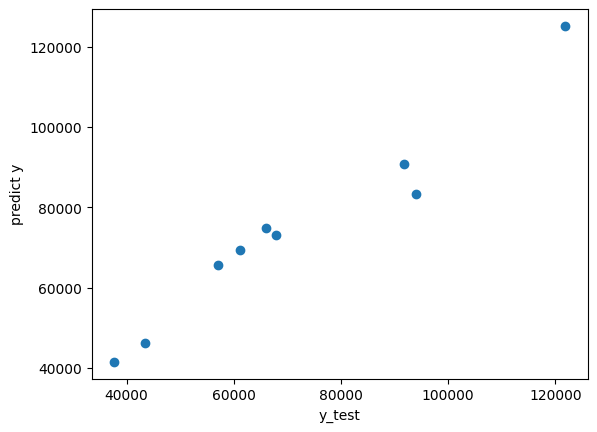

In [83]:
plt.scatter(y_test, test_predict)
plt.xlabel('y_test')
plt.ylabel('predict y')

In [84]:
train_predict = lr.predict(X_train)
train_predict

array([ 93590.867009  ,  64773.83161624,  48041.3594527 ,  57337.17732133,
        76858.39484546, 115900.82989372, 101027.52130391,  37815.9597972 ,
        61985.08625565,  63844.24982937, 103816.2666645 , 123337.48418863,
        64773.83161624,  39675.12337093,  82435.88556664, 111252.92095941,
       108464.17559882,  54548.43196074,  57337.17732133, 116830.41168059,
        55478.0137476 ])

In [85]:
from sklearn import metrics


print('MAE',metrics.mean_absolute_error(y_test, test_predict))
print('MSE',metrics.mean_squared_error(y_test,test_predict))
print('RMSE',np.sqrt(metrics.mean_absolute_error(y_test, test_predict)))
print('r_square',metrics.r2_score(y_test, test_predict))

MAE 5822.33272305098
MSE 44024061.33808143
RMSE 76.304211699296
r_square 0.9308662451595101


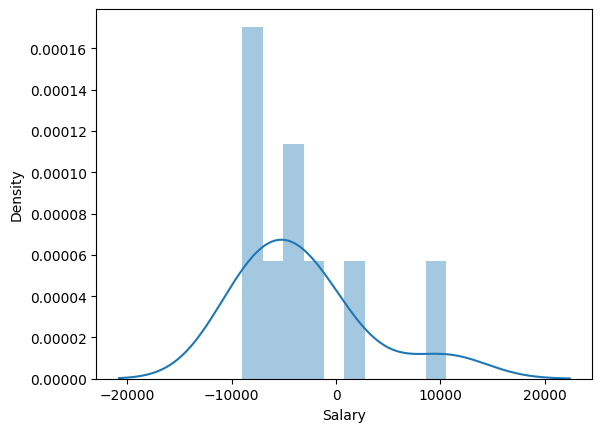

In [86]:
sns.distplot((y_test-test_predict), bins=10);

In [87]:
train_error = y_train-train_predict
train_error

,Salary
21,4682.132991
11,-8979.831616
4,-8150.359453
8,7107.822679
17,6229.605155
26,1068.170106
22,274.478696
0,1527.040203
9,-4796.086256
10,-626.249829


In [88]:
test_error = y_test-test_predict
test_error

,Salary
2,-3803.286945
16,-8970.231272
19,10574.532646
14,-8310.740551
15,-5202.067698
13,-8622.413403
20,935.878352
3,-2657.195879
29,-3324.647762


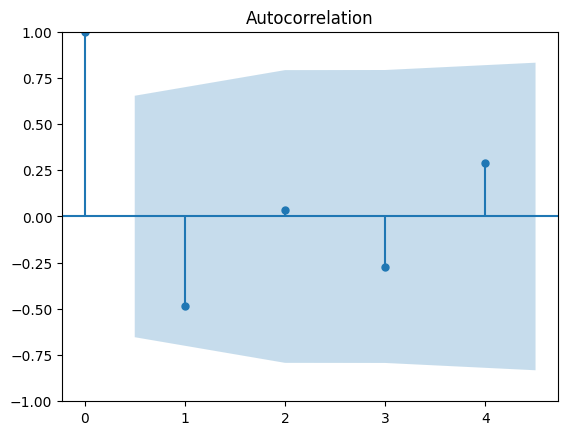

In [89]:
# No auto coorelation
import statsmodels.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf=plot_acf(test_error)
plt.show()

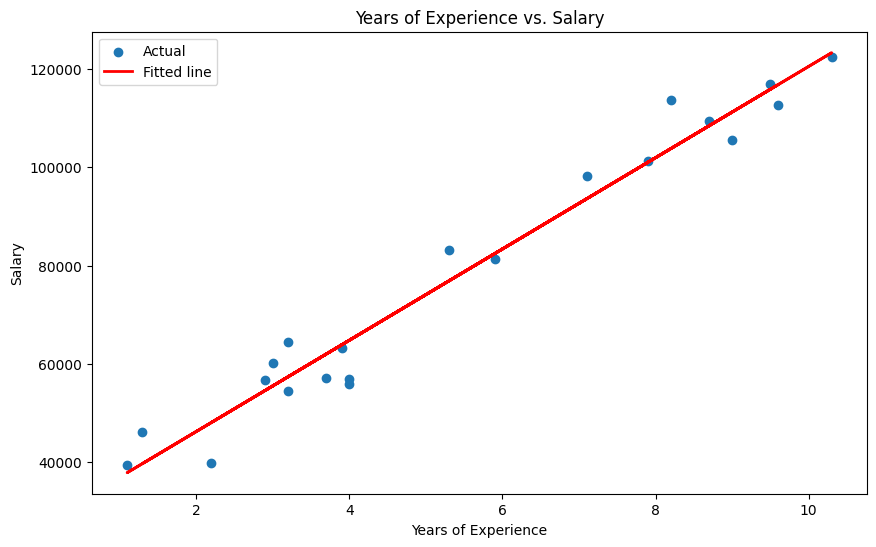

In [90]:
# 1. Linearity: Checking the linearity assumption
plt.figure(figsize=(10, 6))
plt.scatter(X_train['YearsExperience'], y_train, label='Actual')
plt.plot(X_train['YearsExperience'], train_predict, color='red', linewidth=2, label='Fitted line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs. Salary')
plt.legend()
plt.show()

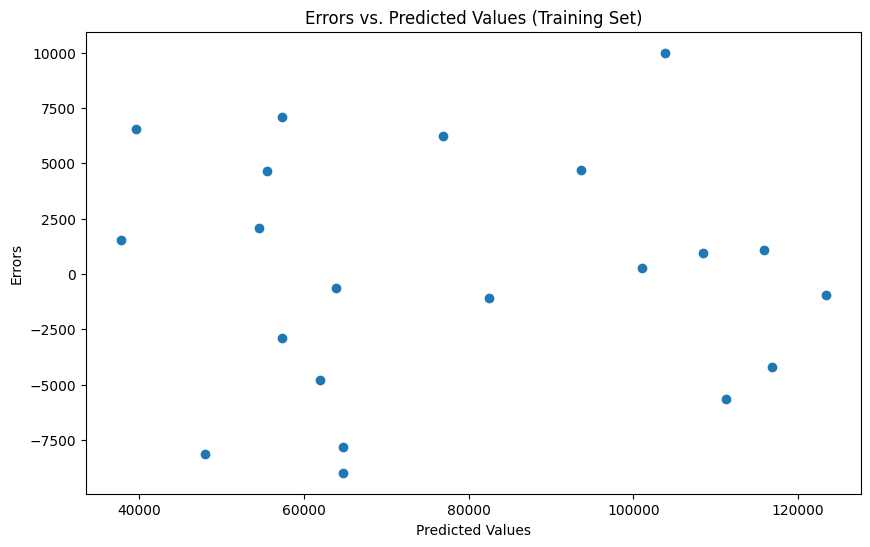

In [91]:
# 2. Independence: Plotting errors vs. predicted values to check for patterns
plt.figure(figsize=(10, 6))
plt.scatter(train_predict, train_error)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')
plt.title('Errors vs. Predicted Values (Training Set)')
plt.show()

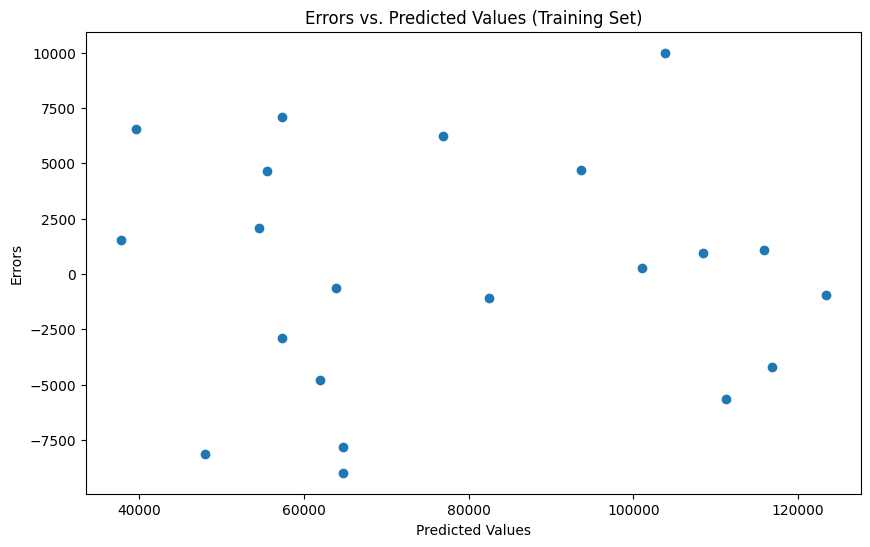

In [92]:
# 3. Homoscedasticity: Plotting errors vs. predicted values again to check constant variance
plt.figure(figsize=(10, 6))
plt.scatter(train_predict, train_error)
plt.xlabel('Predicted Values')
plt.ylabel('Errors')
plt.title('Errors vs. Predicted Values (Training Set)')
plt.show()

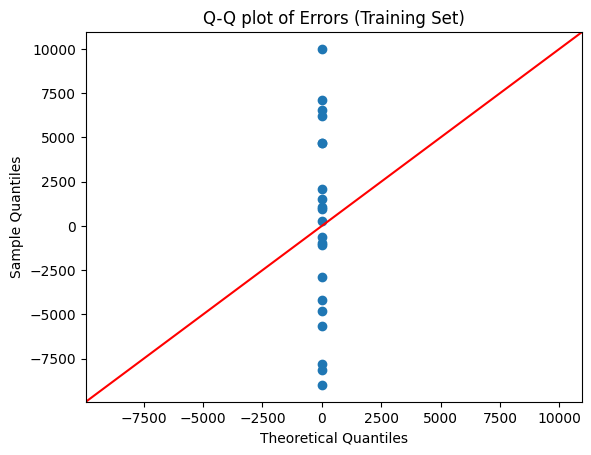

In [93]:
# 4. Normality: Plotting a Q-Q plot to check for normal distribution of errors
import statsmodels.api as sm
sm.qqplot(train_error, line='45')
plt.title('Q-Q plot of Errors (Training Set)')
plt.show()

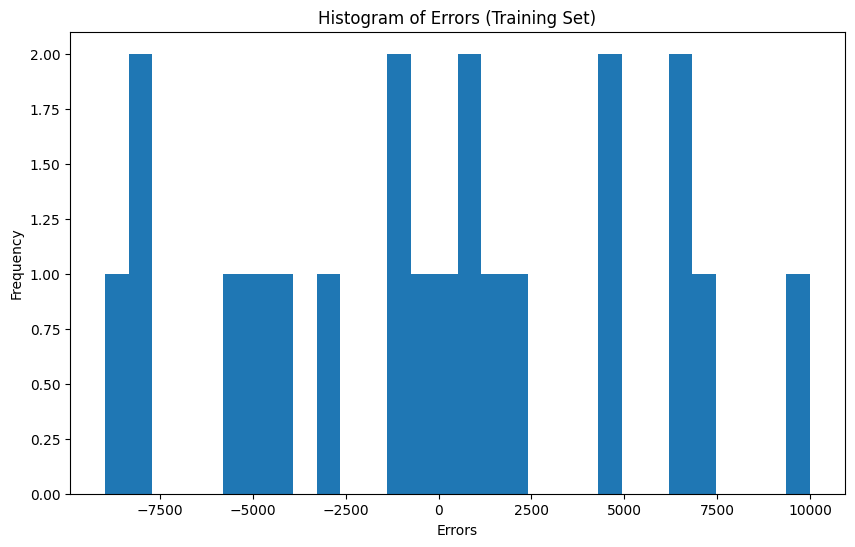

In [94]:
# Optional: Plotting histogram of errors for normality check
plt.figure(figsize=(10, 6))
plt.hist(train_error, bins=30)
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.title('Histogram of Errors (Training Set)')
plt.show()